# Exploratory Data Analysis

In this notebook, I will take an initial look at the data and some of its trends.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.1)

## Loading and Examining Non-Numeric Variables

In [3]:
# load data
df = pd.read_csv('./raw_data/dataset-stroke.csv').drop(columns=['id'])

In [4]:
# quick look
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df[df.age<20][df.stroke==1]

<ipython-input-5-5523eff5fd2d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.age<20][df.stroke==1]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


In [6]:
df[df.age < 10].avg_glucose_level.mean()

93.51972457627119

In [7]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [8]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [9]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

## Baseline Histograms

In [10]:
# get dummies of the categoricals for the sake of visualization 
df = pd.concat([df, pd.get_dummies(df.smoking_status, prefix="Smoker")], axis=1)
df = pd.concat([df, pd.get_dummies(df.Residence_type, prefix="Residence")], axis=1)
df = pd.concat([df, pd.get_dummies(df.work_type, prefix="Work")], axis=1)

In [11]:
# again just temporary for this visualization 
df['gender'] = OneHotEncoder().fit_transform(df.gender.to_numpy().reshape(-1, 1)).toarray()
df['ever_married'] = OneHotEncoder().fit_transform(df.ever_married.to_numpy().reshape(-1, 1)).toarray()

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes,Residence_Rural,Residence_Urban,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children
0,0.0,67.0,0,1,0.0,Private,Urban,228.69,36.6,formerly smoked,...,1,0,0,0,1,0,0,1,0,0
1,1.0,61.0,0,0,0.0,Self-employed,Rural,202.21,NaN,never smoked,...,0,1,0,1,0,0,0,0,1,0
2,0.0,80.0,0,1,0.0,Private,Rural,105.92,32.5,never smoked,...,0,1,0,1,0,0,0,1,0,0
3,1.0,49.0,0,0,0.0,Private,Urban,171.23,34.4,smokes,...,0,0,1,0,1,0,0,1,0,0
4,1.0,79.0,1,0,0.0,Self-employed,Rural,174.12,24.0,never smoked,...,0,1,0,1,0,0,0,0,1,0


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'ever_married'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>],
       [<AxesSubplot:title={'center':'Smoker_Unknown'}>,
        <AxesSubplot:title={'center':'Smoker_formerly smoked'}>,
        <AxesSubplot:title={'center':'Smoker_never smoked'}>,
        <AxesSubplot:title={'center':'Smoker_smokes'}>],
       [<AxesSubplot:title={'center':'Residence_Rural'}>,
        <AxesSubplot:title={'center':'Residence_Urban'}>,
        <AxesSubplot:title={'center':'Work_Govt_job'}>,
        <AxesSubplot:title={'center':'Work_Never_worked'}>],
       [<AxesSubplot:title={'center':'Work_Private'}>,
        <AxesSubplot:title={'center':'Work_Self-emplo

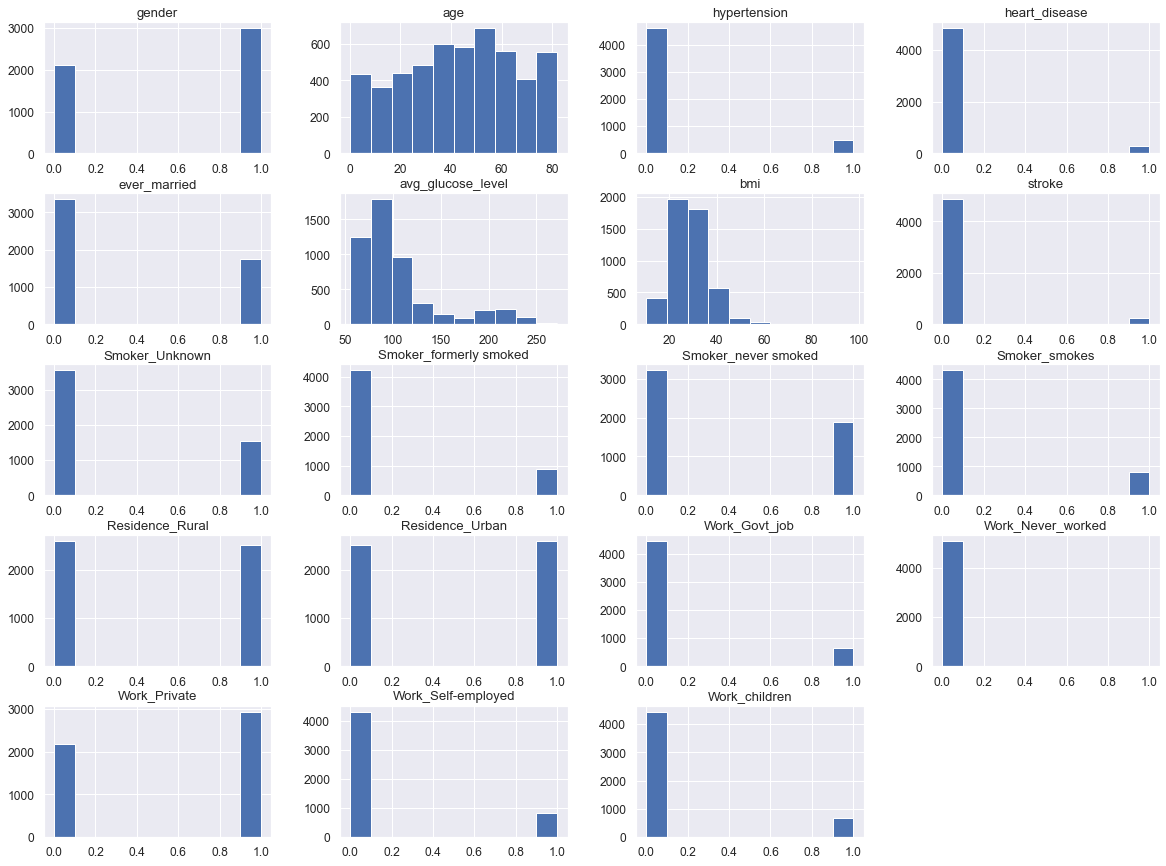

In [13]:
df.hist(figsize=(20,15))

It seems reasonable to expect that older people will have higher rates of stroke. Additionally, the average glucose level/bmi seem likely to be correlated.

## Examining Distribution of Age

<AxesSubplot:xlabel='age'>

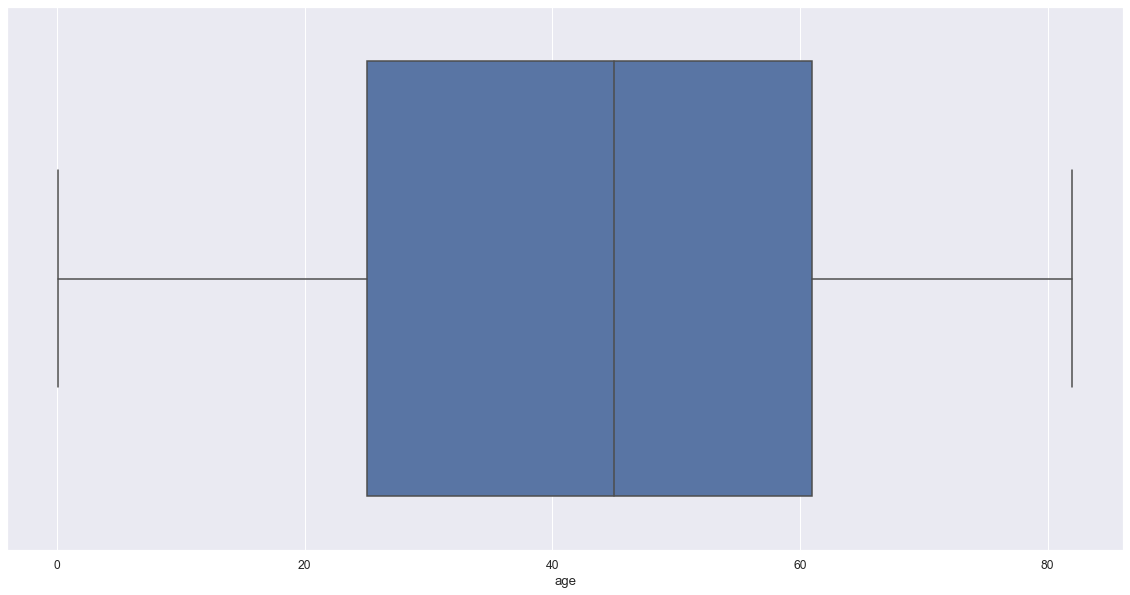

In [14]:
sns.boxplot(data=df, x="age")

No significant skew, but mostly distributed about the middle age range.

## Distribution of age among stroke/no-stroke

<AxesSubplot:xlabel='stroke', ylabel='age'>

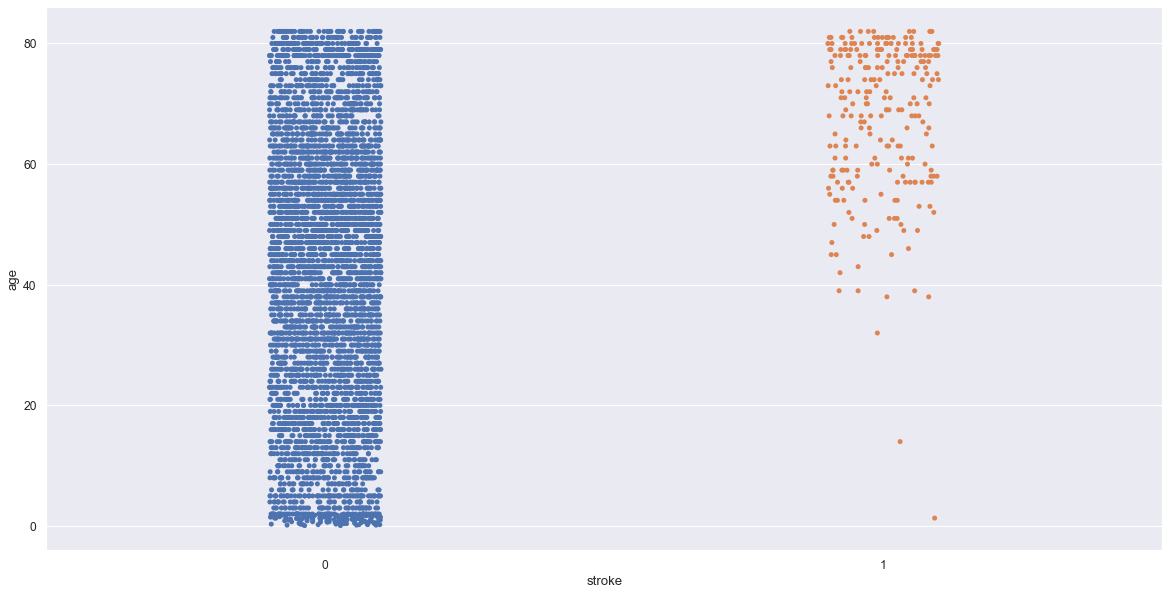

In [15]:
sns.stripplot(data=df, y="age", x="stroke")

## Correlation Matrix

In [16]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Smoker_Unknown,Smoker_formerly smoked,Smoker_never smoked,Smoker_smokes,Residence_Rural,Residence_Urban,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children
gender,1.000000,0.027924,-0.021143,-0.085617,-0.030483,-0.054902,0.026360,-0.009027,-0.059393,-0.043603,0.099111,-0.011306,-0.006340,0.006340,0.016685,-0.011469,0.032294,0.026143,-0.089120
age,0.027924,1.000000,0.276398,0.263796,-0.679125,0.238171,0.333398,0.245257,-0.378231,0.236897,0.119307,0.073133,-0.014180,0.014180,0.130013,-0.078653,0.116534,0.327989,-0.634215
hypertension,-0.021143,0.276398,1.000000,0.108306,-0.164243,0.174474,0.167811,0.127904,-0.141501,0.058853,0.065063,0.031240,0.007913,-0.007913,0.017685,-0.021608,-0.005413,0.115442,-0.129506
heart_disease,-0.085617,0.263796,0.108306,1.000000,-0.114644,0.161857,0.041357,0.134914,-0.066731,0.066804,-0.021856,0.044049,-0.003092,0.003092,0.001330,-0.015712,0.000027,0.086760,-0.091634
ever_married,-0.030483,-0.679125,-0.164243,-0.114644,1.000000,-0.155068,-0.341695,-0.108340,0.332081,-0.171256,-0.102845,-0.105226,0.006261,-0.006261,-0.134041,0.090838,-0.153830,-0.192716,0.544441
avg_glucose_level,-0.054902,0.238171,0.174474,0.161857,-0.155068,1.000000,0.175502,0.131945,-0.095131,0.068111,0.023885,0.017646,0.004946,-0.004946,0.013845,-0.014675,0.016588,0.062694,-0.102250
bmi,0.026360,0.333398,0.167811,0.041357,-0.341695,0.175502,1.000000,0.042374,-0.270340,0.107031,0.107964,0.088324,0.000122,-0.000122,0.079584,-0.028602,0.208029,0.072701,-0.448674
stroke,-0.009027,0.245257,0.127904,0.134914,-0.108340,0.131945,0.042374,1.000000,-0.055892,0.064556,-0.004129,0.008939,-0.015458,0.015458,0.002677,-0.014882,0.011888,0.062168,-0.083869
Smoker_Unknown,-0.059393,-0.378231,-0.141501,-0.066731,0.332081,-0.095131,-0.270340,-0.055892,1.000000,-0.301156,-0.504546,-0.281177,0.002036,-0.002036,-0.097418,0.008804,-0.210013,-0.106250,0.512743
Smoker_formerly smoked,-0.043603,0.236897,0.058853,0.066804,-0.171256,0.068111,0.107031,0.064556,-0.301156,1.000000,-0.350934,-0.195571,-0.007654,0.007654,0.029686,-0.030095,0.025526,0.093260,-0.160668


<AxesSubplot:>

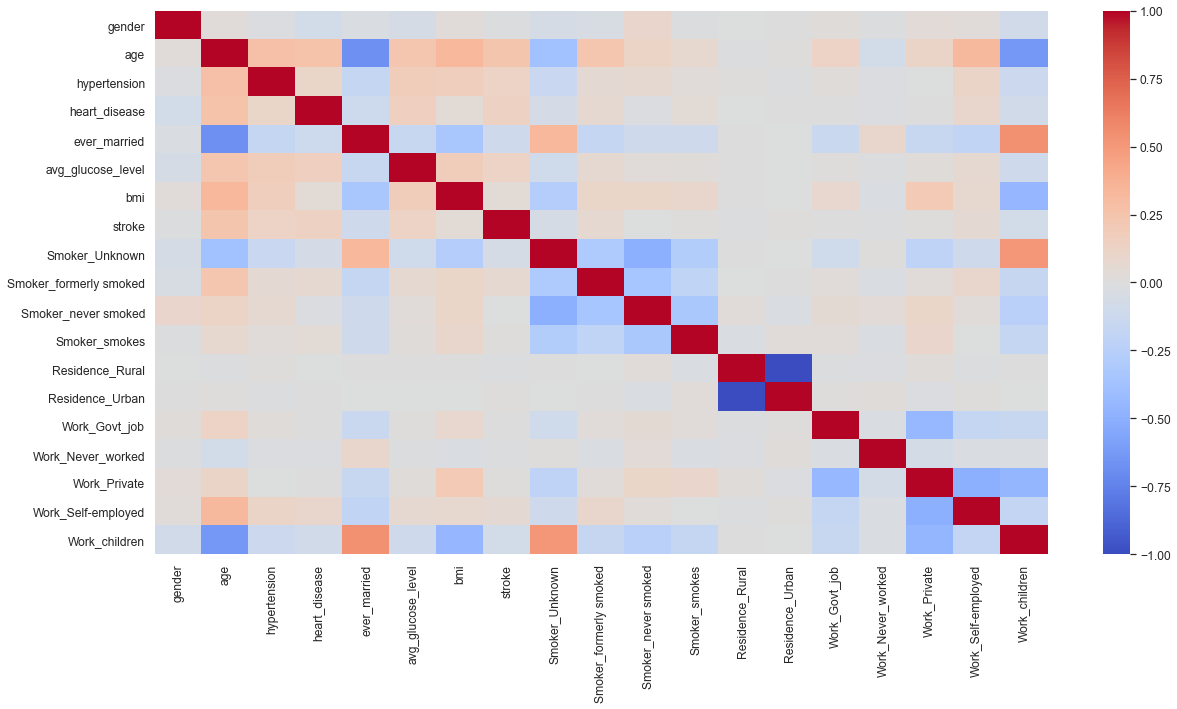

In [17]:
sns.heatmap(data = df.corr(), cmap = "coolwarm")

## 

<AxesSubplot:xlabel='stroke', ylabel='age'>

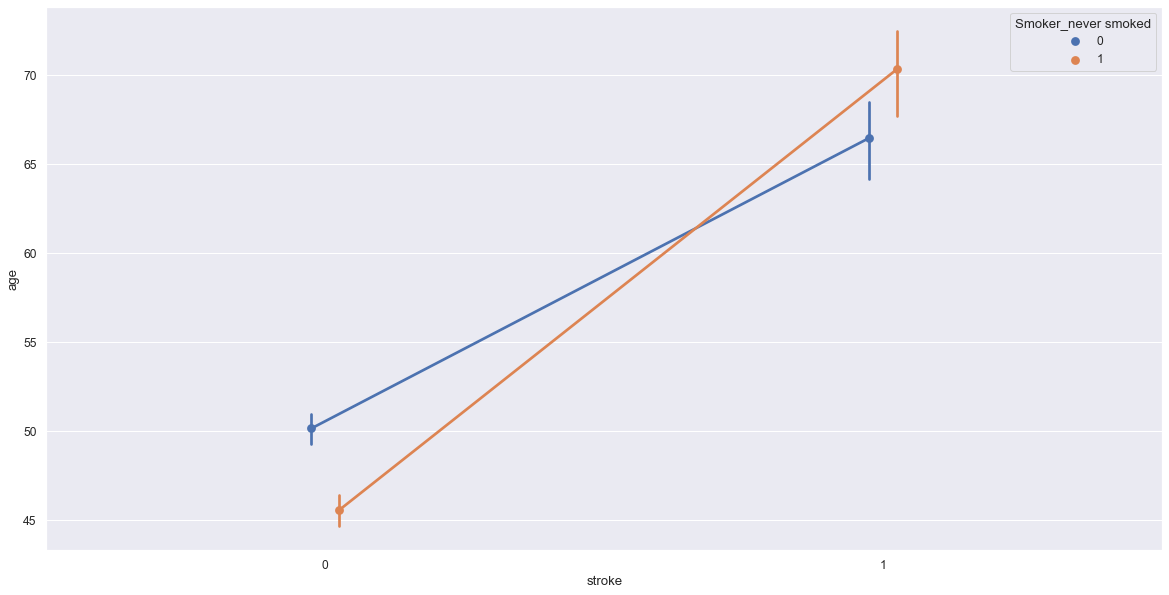

In [18]:
sns.pointplot(data=df[df.smoking_status != "Unknown"], x="stroke", y="age", hue="Smoker_never smoked", dodge=True)

Above is a pointplot that examines the participants whose smoking history we know. Point plots essentially just show the expected value and confidence interval. This plot shows us that those who have never smoked, but have had a stroke tend to be older than those that have smoked and had a stroke. 

Perhaps less interesting, this also shows us that younger people are less likely to have a stroke.

## Problem

~19% of the stroke cases are missing BMI data...

In [19]:
df.isnull().sum()

gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
Residence_type              0
avg_glucose_level           0
bmi                       201
smoking_status              0
stroke                      0
Smoker_Unknown              0
Smoker_formerly smoked      0
Smoker_never smoked         0
Smoker_smokes               0
Residence_Rural             0
Residence_Urban             0
Work_Govt_job               0
Work_Never_worked           0
Work_Private                0
Work_Self-employed          0
Work_children               0
dtype: int64

In [20]:
df[df.bmi.isnull() == True].stroke.sum()

40

In [21]:
df.stroke.sum()

249

In [22]:
print(f"Ranking of correlation between stroke and BMI. There are {sorted(df.corr()['stroke'], reverse=True).index(df.corr()['stroke']['bmi'])} attributes that are more correlated with stroke than BMI.")

Ranking of correlation between stroke and BMI. There are 7 attributes that are more correlated with stroke than BMI.


le = 

In [23]:
le = LabelEncoder()

df['smoker'] = le.fit_transform(df.smoking_status)

<AxesSubplot:xlabel='bmi', ylabel='age'>

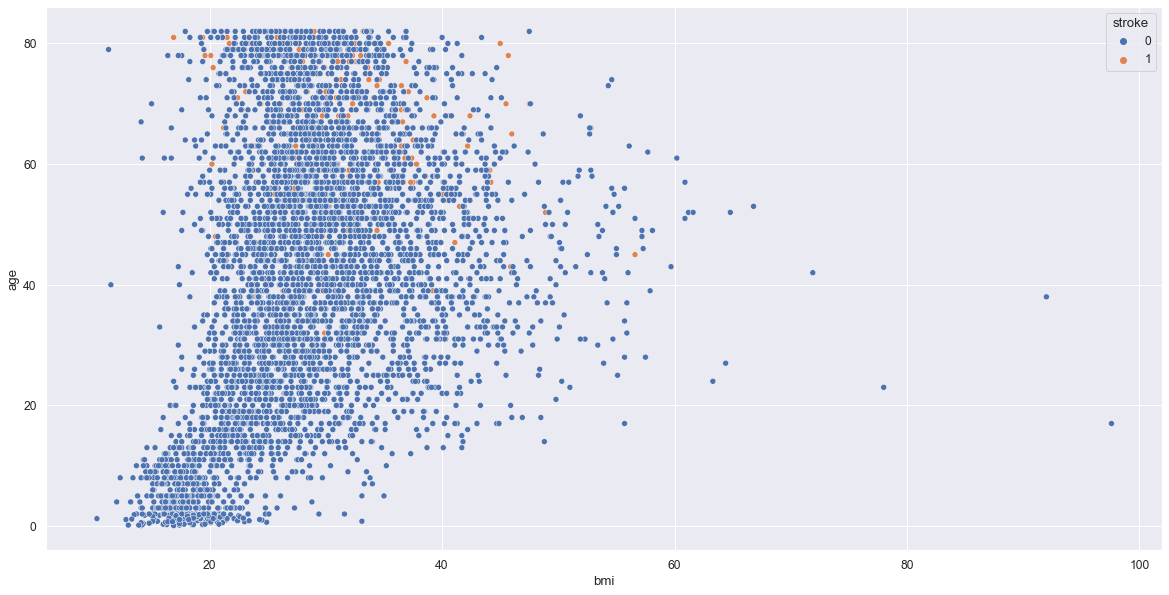

In [24]:
sns.scatterplot(data = df, x='bmi', y='age', hue='stroke')

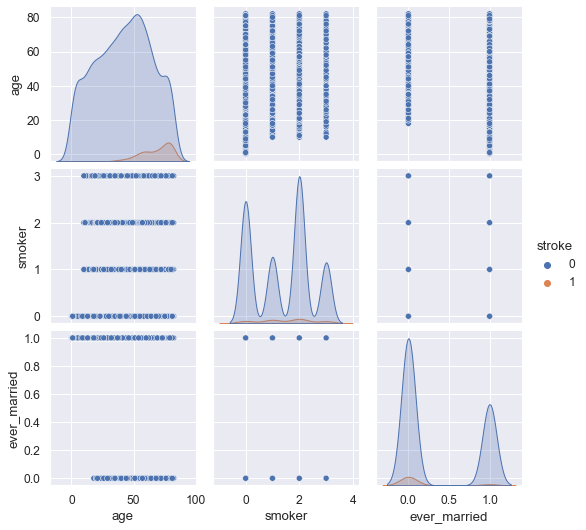

In [25]:
sns.pairplot(df[['age','smoker','ever_married', 'stroke']], hue='stroke')